1. Выбор датасета:
    - Датасет о пассажирах Титаника: [Titanic Dataset](https://www.kaggle.com/c/titanic)
    - Датасет о диабете: [Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
2. Загрузите выбранный датасет и выполните предварительную обработку данных. 
3. Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
4. Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим.
5. Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas. Ваша реализация логистической регрессии должна включать в себя:
    - Функцию для вычисления гипотезы (sigmoid function).
    - Функцию для вычисления функции потерь (log loss).
    - Метод обучения, который включает в себя градиентный спуск.
    - Возможность варьировать гиперпараметры, такие как коэффициент обучения (learning rate) и количество итераций.
6. Исследование гиперпараметров:
    - Проведите исследование влияния гиперпараметров на производительность модели. Варьируйте следующие гиперпараметры:
        - Коэффициент обучения (learning rate).
        - Количество итераций обучения.
        - Метод оптимизации (например, градиентный спуск или оптимизация Ньютона).
7. Оценка модели:
    - Для каждой комбинации гиперпараметров оцените производительность модели на тестовом наборе данных, используя метрики, такие как accuracy, precision, recall и F1-Score.

Сделайте выводы о том, какие значения гиперпараметров наилучшим образом работают для данного набора данных и задачи классификации. Обратите внимание на изменение производительности модели при варьировании гиперпараметров.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /Users/kseniaignateva/.cache/kagglehub/datasets/uciml/pima-indians-diabetes-database/versions/1


In [3]:
file_name = 'diabetes.csv'
df = pd.read_csv(f'{path}/{file_name}')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print([i for i in df.columns])

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'missing_values': missing_values,
    'percentage': missing_percentage
}).sort_values(by='missing_values', ascending=False)

print(missing_summary)

                          missing_values  percentage
Pregnancies                            0         0.0
Glucose                                0         0.0
BloodPressure                          0         0.0
SkinThickness                          0         0.0
Insulin                                0         0.0
BMI                                    0         0.0
DiabetesPedigreeFunction               0         0.0
Age                                    0         0.0
Outcome                                0         0.0


In [11]:
stats = df.describe()
stats

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
print(stats.index)
print(stats.columns)

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


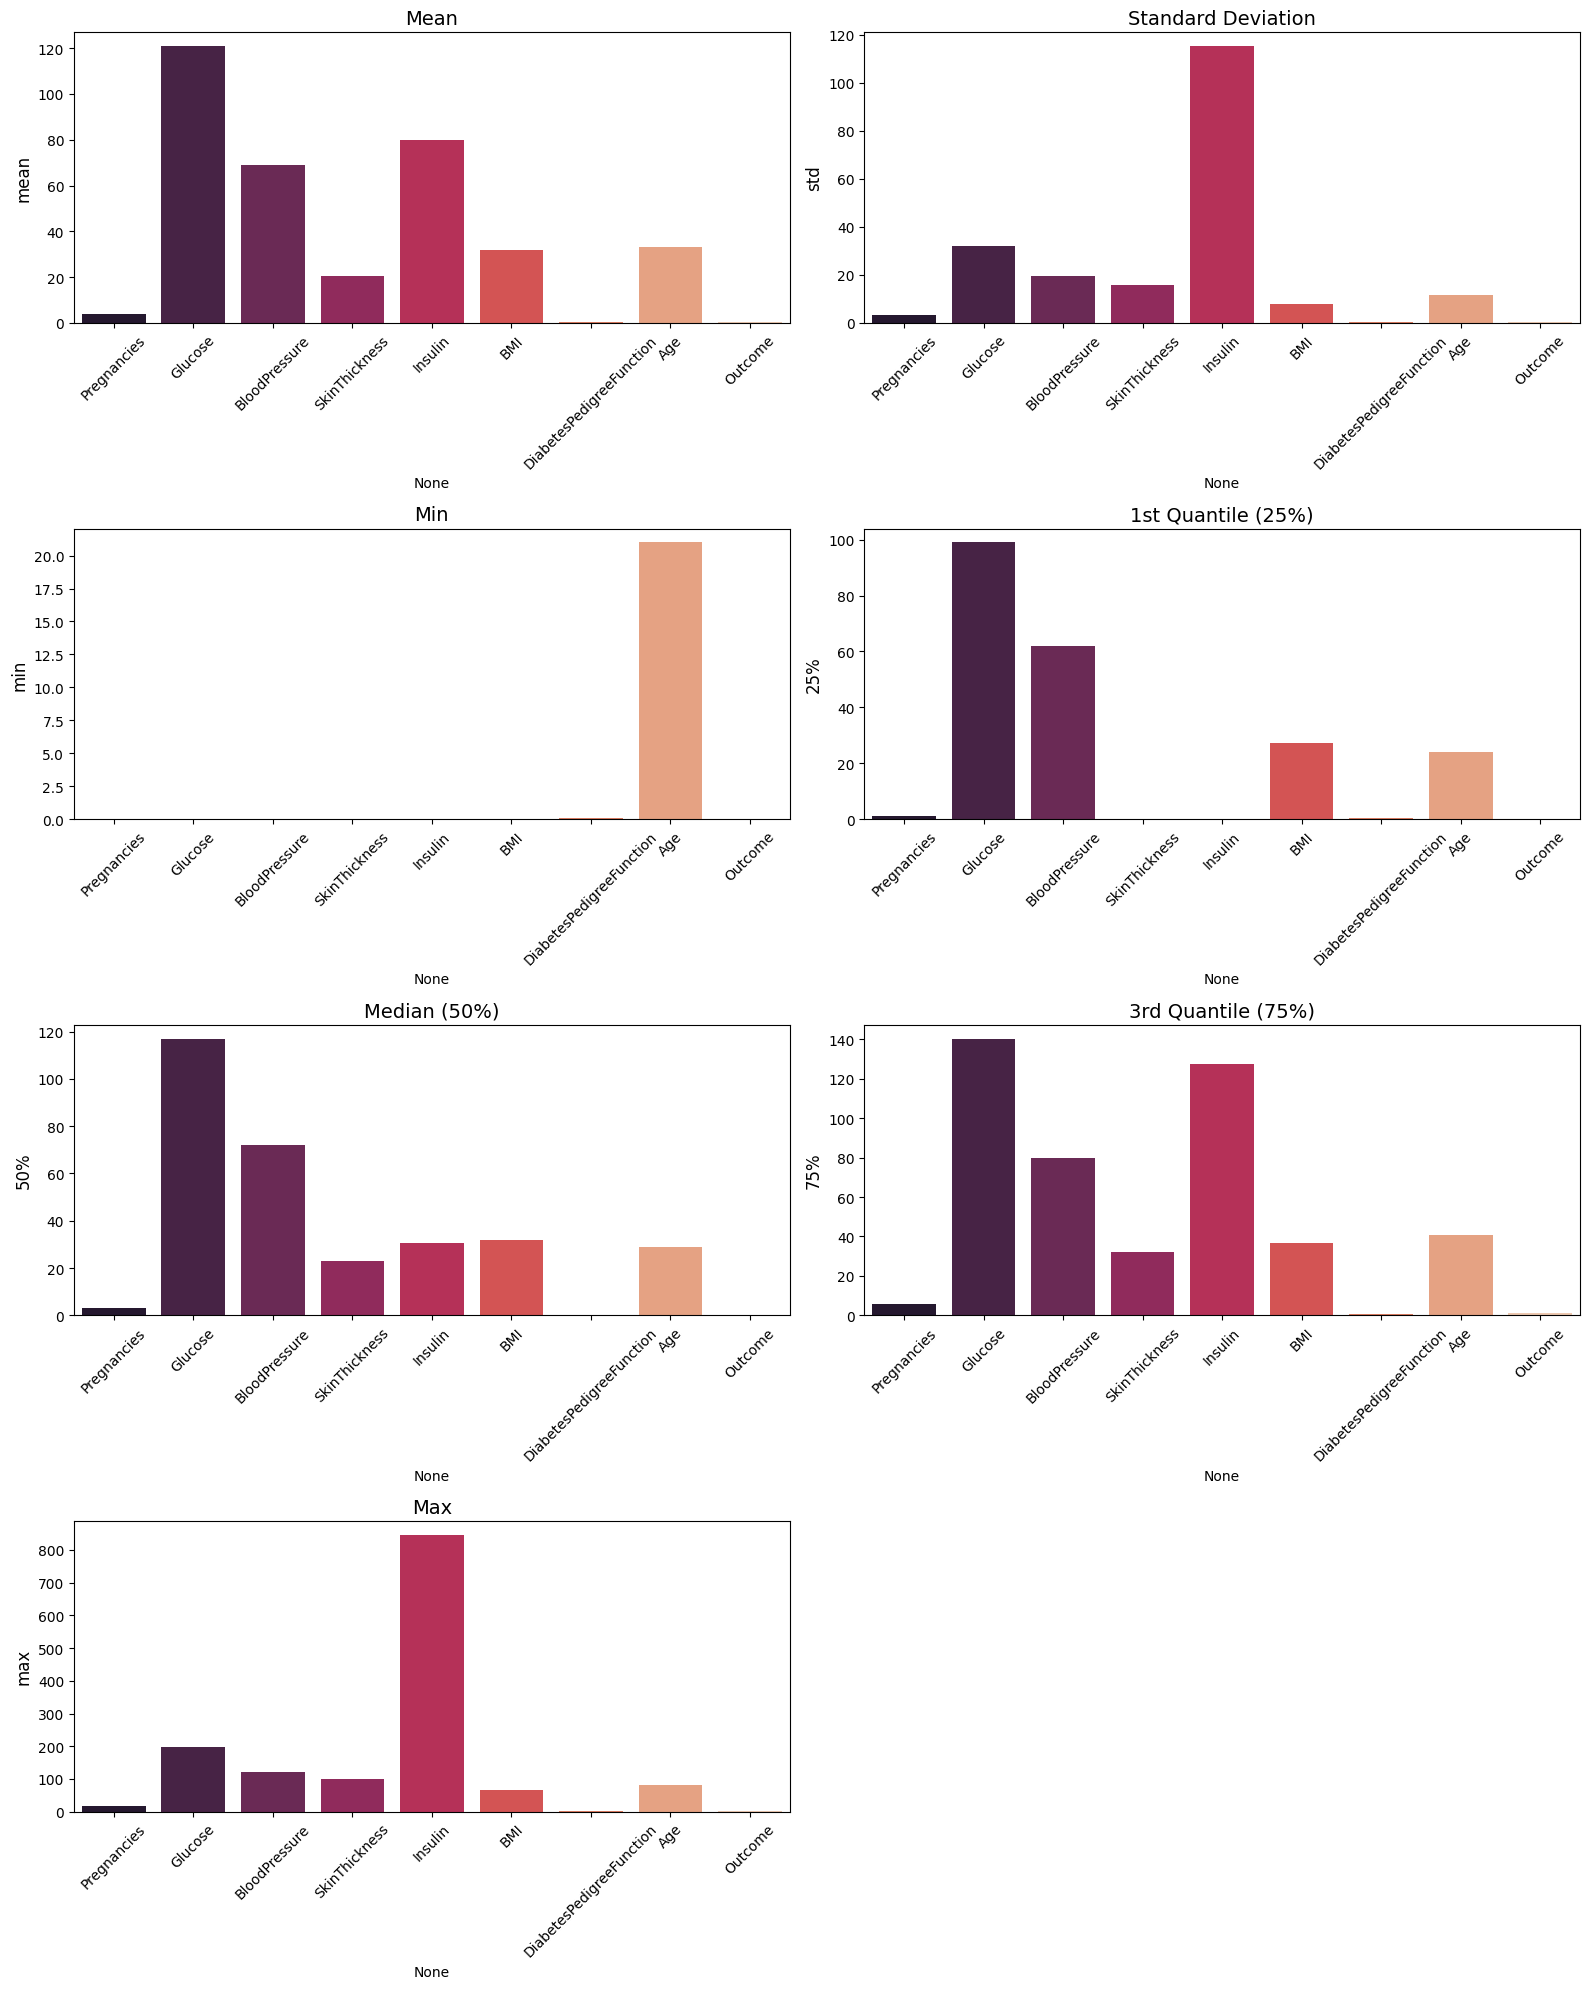

In [13]:
stats_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
titles = [
    "Mean",
    "Standard Deviation",
    "Min",
    "1st Quantile (25%)",
    "Median (50%)",
    "3rd Quantile (75%)",
    "Max",
]

plt.figure(figsize=(16, 20))
for i, stat in enumerate(stats_to_plot):
    plt.subplot(4, 2, i + 1)
    sns.barplot(x=stats.columns, y=stats.loc[stat], palette="rocket")
    plt.title(titles[i], fontsize=14)
    plt.ylabel(stat, fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

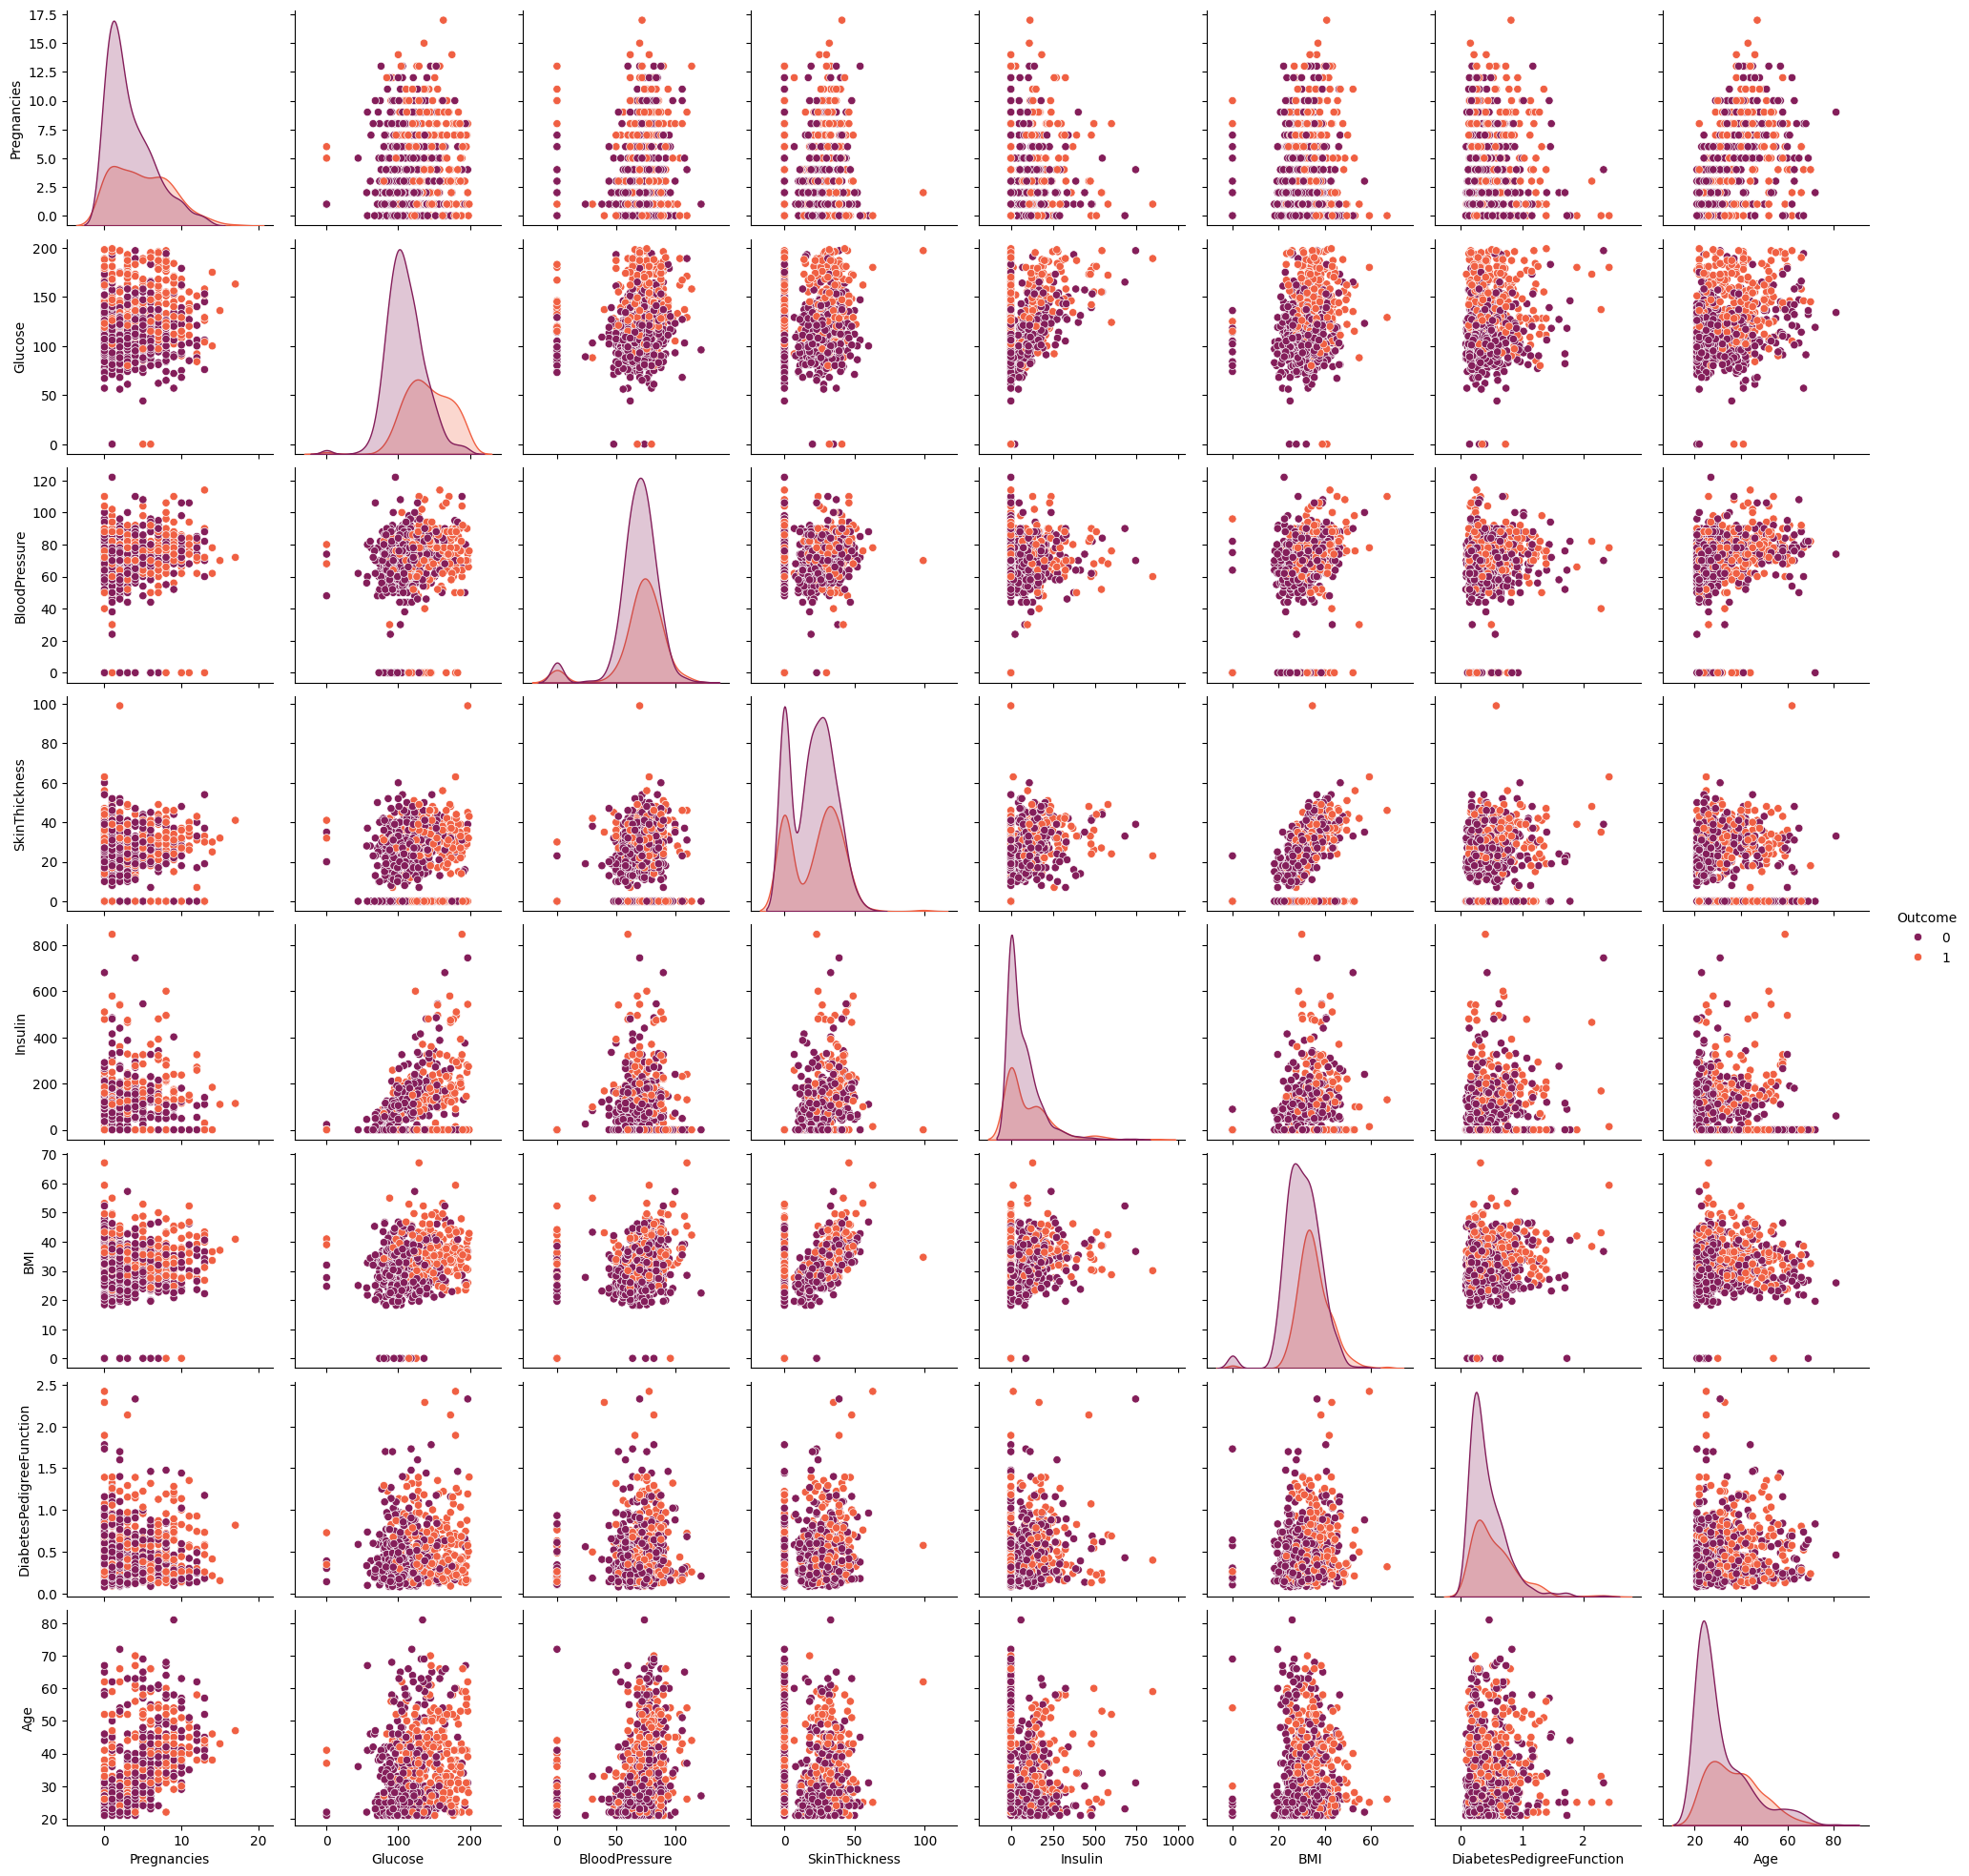

In [14]:
plt.figure()
sns.pairplot(df,hue='Outcome', palette='rocket')
plt.show()

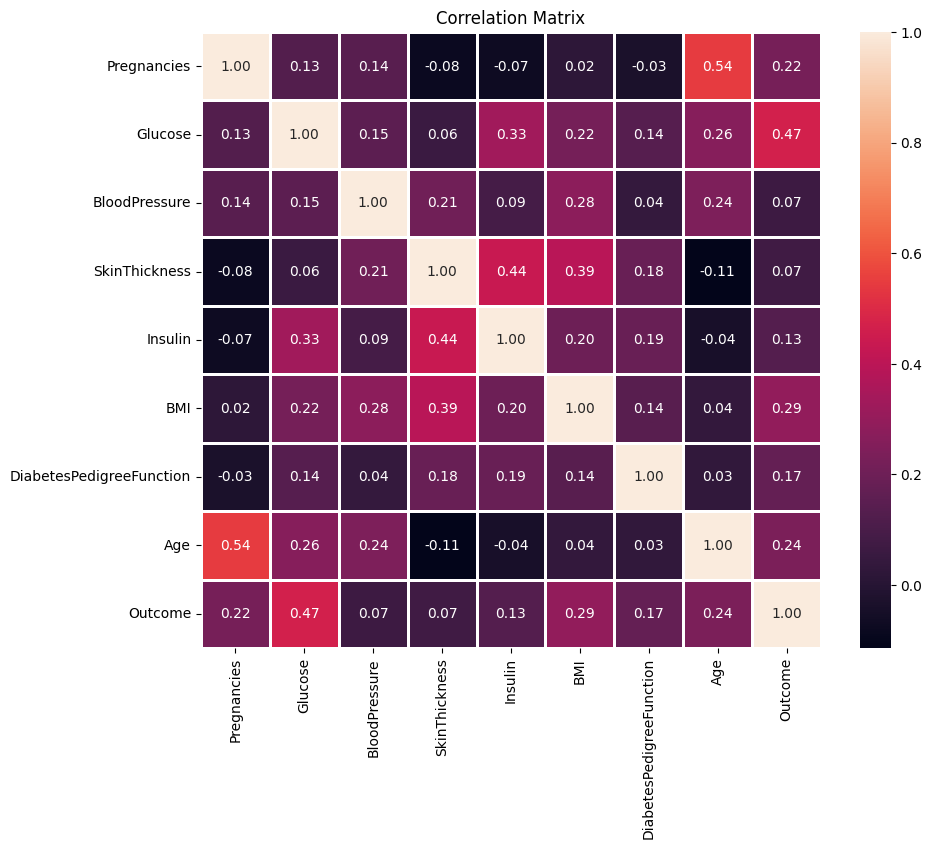

In [15]:
def corr_heatmap(df):
    
    corr_matrix=df.corr(numeric_only=True)
    plt.figure(figsize=(10,8))
    sns.heatmap(corr_matrix,annot=True,fmt='.2f',linewidths=2 ,cmap='rocket')
    plt.title('Correlation Matrix')
    plt.show()

corr_heatmap(df)

In [16]:
for col in df.columns[1:-3]:
    df[col].replace(0,np.NaN, inplace=True)
    df[col].fillna(round(df[col].mean(skipna=True)), inplace=True)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,156.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,156.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,156.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,156.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,156.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,156.0,32.0,0.232,54,1


robust scaler лучше подходит
- фиксит выбросы 
- использует для приведения данных медиану и 1-3 интерквантильный размах 

In [17]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_processed = scaler.fit_transform(df)
df_processed

X = np.delete(df_processed, 8, axis=1)
y = df_processed[:, 8]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
print(f'X_train size: {X_train.shape}')
print(f'y_train size: {y_train.shape}')
print(f'X_test size: {X_test.shape}')
print(f'y_test size: {y_test.shape}')

X_train size: (537, 8)
y_train size: (537,)
X_test size: (231, 8)
y_test size: (231,)


### outliers detection 

In [19]:
def detect_outliers(df, k=1.5):
    
    outlier_indices = []
    outliers_df = pd.DataFrame()
    
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75) 
        
        IQR = Q3 - Q1 
        
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers_in_col.index)
        outliers_df = pd.concat([outliers_df, outliers_in_col], axis=0)
        
    # remove duplicate indices
    outlier_indices = list(set(outlier_indices))
    
    # remove duplicate rows in the outliers df
    outliers_df = outliers_df.drop_duplicates()
    
    return outliers_df, outlier_indices

In [20]:
outliers_df, outlier_indices = detect_outliers(df)
outliers_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1
455,14,175.0,62.0,30.0,156.0,33.6,0.212,38,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
84,5,137.0,108.0,29.0,156.0,48.8,0.227,37,1
106,1,96.0,122.0,29.0,156.0,22.4,0.207,27,0
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


In [21]:
df_cleaned=df.drop(outlier_indices).reset_index(drop=True)
print(f'past: {len(df)}\nnow: {len(df_cleaned)}\ndroped: {int(len(df)) - int(len(df_cleaned))}')

past: 768
now: 517
droped: 251


In [22]:
X=df_cleaned.drop('Outcome',axis=1)
y=df_cleaned['Outcome']
print(f'X: {X.shape}\ny: {y.shape}')

X: (517, 8)
y: (517,)


## logistic regression

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y_true, y_pred, epsilon=1e-15):
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    m = len(y_true)
    return -1 / m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [69]:
import wandb
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
np.random.seed(88)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_=0):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_ = lambda_
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.random.randn(n) * 0.01
        self.bias = 0

        for i in range(self.iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = 1 / m * np.dot(X.T, (y_pred - y)) + (self.lambda_ / m) * self.weights
            db = 1 / m * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = log_loss(y, y_pred)
            self.losses.append(loss)
                       
            wandb.log({'loss': loss})

            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss:.5f}")
                wandb.log({"iteration": i, "loss": loss})

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred >= 0.5).astype(int)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [76]:
wandb.init(
    project="logistic_regression",
    config={
        "learning_rate": 0.05,
        "iterations": 1500,
        "lambda_": 0.1,
    }
)
config = wandb.config

model = LogisticRegression(
    learning_rate=config.learning_rate,
    iterations=config.iterations,
    lambda_=config.lambda_
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = np.mean(y_pred == y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(classification_report(y_test, y_pred))

wandb.log({
    "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
    "f1_score": f1,
})

Iteration 0: Loss = 0.69745
Iteration 100: Loss = 0.54263
Iteration 200: Loss = 0.50886
Iteration 300: Loss = 0.49498
Iteration 400: Loss = 0.48827
Iteration 500: Loss = 0.48470
Iteration 600: Loss = 0.48268
Iteration 700: Loss = 0.48149
Iteration 800: Loss = 0.48076
Iteration 900: Loss = 0.48030
Iteration 1000: Loss = 0.48001
Iteration 1100: Loss = 0.47982
Iteration 1200: Loss = 0.47970
Iteration 1300: Loss = 0.47961
Iteration 1400: Loss = 0.47956
Accuracy: 0.7662
Precision: 0.6780
Recall: 0.5333
F1 Score: 0.5970
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       156
         1.0       0.68      0.53      0.60        75

    accuracy                           0.77       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



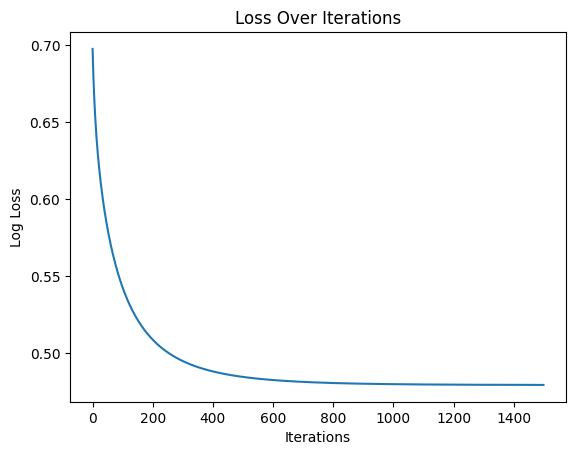

In [77]:
plt.plot(range(model.iterations), model.losses)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Loss Over Iterations")
plt.show()

In [78]:
from sklearn.model_selection import KFold
import numpy as np

def cross_validate(model_class, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=88)
    
    X = X.values if hasattr(X, "values") else np.array(X)
    y = y.values if hasattr(y, "values") else np.array(y)
    
    metrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": []
    }
    
    fold = 1
    for train_index, val_index in kf.split(X):
        print(f"\nFold {fold}/{k}")
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]
        
        model = model_class(
            learning_rate=config.learning_rate,
            iterations=config.iterations,
            lambda_=config.lambda_
        )
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_val)
        accuracy = np.mean(y_pred == y_val)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        metrics["accuracy"].append(accuracy)
        metrics["precision"].append(precision)
        metrics["recall"].append(recall)
        metrics["f1"].append(f1)
        
        print(f"Fold {fold} Metrics:")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        
        wandb.log({
            f"fold_{fold}_accuracy": accuracy,
            f"fold_{fold}_precision": precision,
            f"fold_{fold}_recall": recall,
            f"fold_{fold}_f1": f1
        })
        
        fold += 1
    
    avg_metrics = {key: np.mean(values) for key, values in metrics.items()}
    print("\nAverage Metrics Across All Folds:")
    for metric, value in avg_metrics.items():
        print(f"{metric.capitalize()}: {value:.4f}")
        wandb.log({f"cv_avg_{metric}": value})
    
    return avg_metrics



Fold 1/5
Iteration 0: Loss = 1.00651
Iteration 100: Loss = 12.09450
Iteration 200: Loss = 12.71161
Iteration 300: Loss = 18.06184
Iteration 400: Loss = 12.41139
Iteration 500: Loss = 11.07851
Iteration 600: Loss = 9.13415
Iteration 700: Loss = 16.48793
Iteration 800: Loss = 14.68514
Iteration 900: Loss = 14.43634
Iteration 1000: Loss = 13.96866
Iteration 1100: Loss = 14.11878
Iteration 1200: Loss = 13.88295
Iteration 1300: Loss = 13.80222
Iteration 1400: Loss = 13.84757
Fold 1 Metrics:
  Accuracy: 0.4615
  Precision: 0.3108
  Recall: 0.8214
  F1 Score: 0.4510

Fold 2/5
Iteration 0: Loss = 0.65798
Iteration 100: Loss = 9.74380
Iteration 200: Loss = 11.62443
Iteration 300: Loss = 9.07792
Iteration 400: Loss = 21.43804
Iteration 500: Loss = 11.62443
Iteration 600: Loss = 11.62443
Iteration 700: Loss = 9.43629
Iteration 800: Loss = 11.62443
Iteration 900: Loss = 11.57349
Iteration 1000: Loss = 17.61731
Iteration 1100: Loss = 10.33935
Iteration 1200: Loss = 20.03299
Iteration 1300: Loss = 

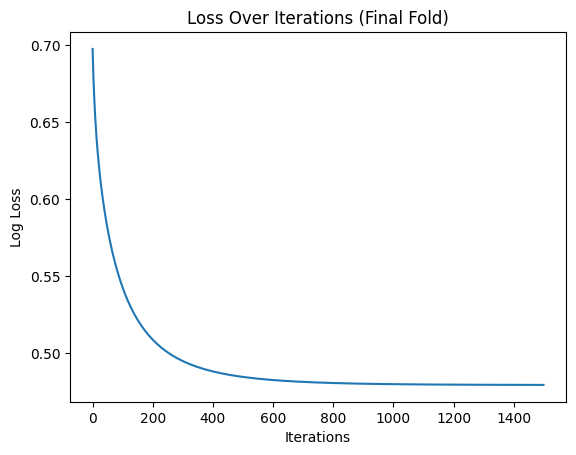

In [79]:
avg_metrics = cross_validate(LogisticRegression, X, y, k=5)

plt.plot(range(model.iterations), model.losses)
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("Loss Over Iterations (Final Fold)")
plt.show()